In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import glob

In [2]:
# G2 >> scene 
# G1 >> obj?

# obj2 , obj6 are not in the sceen 

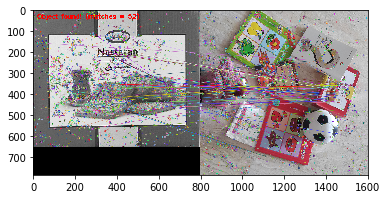

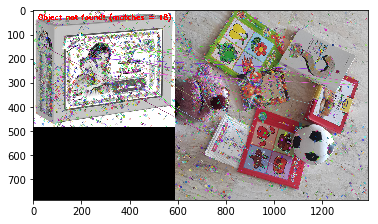

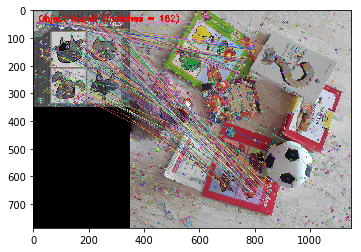

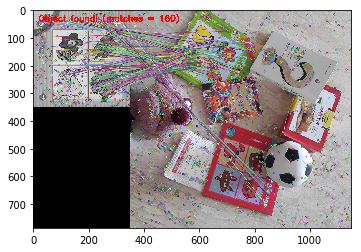

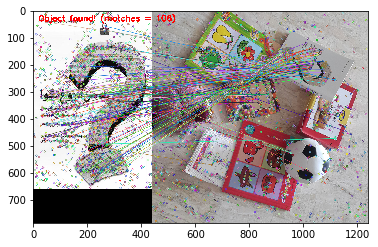

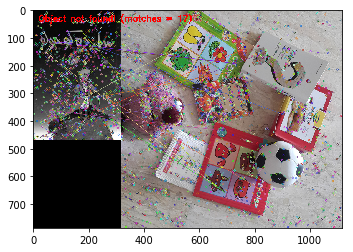

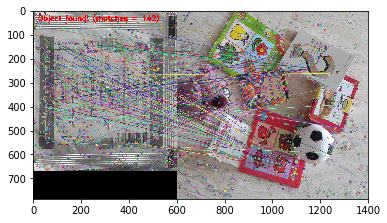

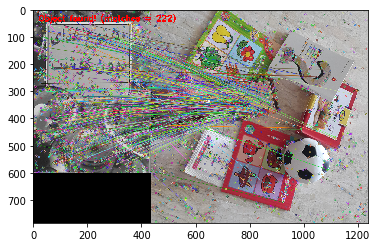

In [3]:
sift = cv2.xfeatures2d.SIFT_create() # opencv 3

I2 = cv2.imread('../Data/scene.jpg')
G2 = cv2.cvtColor(I2,cv2.COLOR_BGR2GRAY)
keypoints2, desc2 = sift.detectAndCompute(G2, None); 

fnames = glob.glob('../Data/obj?.jpg')
fnames.sort()
for fname in fnames:

    I1 = cv2.imread(fname)
    G1 = cv2.cvtColor(I1,cv2.COLOR_BGR2GRAY)
    keypoints1, desc1 = sift.detectAndCompute(G1, None); 
    cv2.drawKeypoints(G1,keypoints2,I1)      
    
    # brute-force matching
    bf = cv2.BFMatcher(crossCheck=False)
    matches = bf.knnMatch(desc1, desc2, k=2)
    
    good_matches = []
    alpha = 0.75
    for m1,m2 in matches:
        # m1 is the best match
        # m2 is the second best match
        if m1.distance < alpha *m2.distance:
            good_matches.append(m1)
    
    I = cv2.drawMatches(I1,keypoints1,I2,keypoints2,good_matches, None)
    
    no_matches = len(good_matches)
    
    if no_matches > 30:
        txt = "Object found! (matches = %d)"%no_matches
    else:
        txt = "Object not found! (matches = %d)"%no_matches

    cv2.putText(I,txt,(20,40),cv2.FONT_HERSHEY_SIMPLEX, 1,(0,0,255),3)
    plt.imshow(I[:,:,::-1])
    plt.show()
    # cv2.imshow('keypoints',I)

#     if cv2.waitKey() & 0xFF == ord('q'):
#         break
# cv2.destroyAllWindows()